### Setup and index
Select a single measurement from database

In [3]:
import lib.csv_helpers as csv
import lib.data_process 
import lib.json_setup as json_setup
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

# change directory to wherever you have your setup and data folders
os.chdir('/Users/calum/Desktop/spectrometer')

# select the appropriate setup file, and read it in
setup_path = "setup/20220818_s44077.json"
setup = json_setup.json_to_dict(setup_path)

# Read in the index file of the metadata 
meta_df = csv.read_metadata(setup)

# Filter for the measurement you are interested in
meta_df = csv.select_from_metadata('fluid', 'Air', meta_df)
# meta_df = csv.select_from_metadata('element', 'A01', meta_df)
meta_df

INFO:root:filtering by metadata "fluid" == "Air"


,date,instrument,sensor,element,structure,surface,fluid,repeats,comment
index,,,,,,,,,
s44077_pre-iDOT-A01-Air,2022-08-18,broadbandLED_instrument,s44077_pre-iDOT,A01,-,[,Air,3,<NA>
s44077_pre-iDOT-A02-Air,2022-08-18,broadbandLED_instrument,s44077_pre-iDOT,A02,-,[,Air,3,<NA>
s44077_pre-iDOT-A03-Air,2022-08-18,broadbandLED_instrument,s44077_pre-iDOT,A03,-,[,Air,3,<NA>
s44077_pre-iDOT-A04-Air,2022-08-18,broadbandLED_instrument,s44077_pre-iDOT,A04,-,[,Air,3,<NA>
s44077_pre-iDOT-A05-Air,2022-08-18,broadbandLED_instrument,s44077_pre-iDOT,A05,-,[,Air,3,<NA>
...,...,...,...,...,...,...,...,...,...
s44077_pre-iDOT-E12-Air,2022-08-18,broadbandLED_instrument,s44077_pre-iDOT,E12,-,[,Air,3,<NA>
s44077_pre-iDOT-E13-Air,2022-08-18,broadbandLED_instrument,s44077_pre-iDOT,E13,-,[,Air,3,<NA>
s44077_pre-iDOT-E14-Air,2022-08-18,broadbandLED_instrument,s44077_pre-iDOT,E14,-,[,Air,3,<NA>


### Process data

Apply any desired processing options (as defined in the data_process.py file)

In [4]:

# Read in the actual spectral data, merging all measurements into a single dataframe
merged_df, title = csv.merge_dataframes(setup, meta_df)

# Configure the parameters for processing the data
dp = lib.data_process.DataProcessor()
dp.apply_avg_repeats = True
dp.apply_normalise = True
dp.apply_smooth = False
dp.apply_trim = False
dp.apply_interpolate = False
dp.apply_round = True

dp.smooth_points = 3
dp.wavelength_trim_min = 540
dp.wavelength_trim_max = 730
dp.round_decimals = 3

# Apply the processing
df = dp.process_dataframe(merged_df)
df

,A01__avg,A02__avg,A03__avg,A04__avg,A05__avg,A06__avg,A07__avg,A08__avg,A09__avg,A10__avg,...,E07__avg,E08__avg,E09__avg,E10__avg,E11__avg,E12__avg,E13__avg,E14__avg,E15__avg,E16__avg
wavelength,,,,,,,,,,,,,,,,,,,,,
450.30,0.755,0.754,0.760,0.755,0.754,0.769,0.755,0.758,0.742,0.755,...,0.771,0.755,0.756,0.756,0.744,0.758,0.747,0.751,0.750,0.745
450.67,0.761,0.760,0.757,0.744,0.747,0.759,0.756,0.762,0.743,0.766,...,0.765,0.764,0.762,0.747,0.754,0.753,0.751,0.753,0.764,0.762
451.04,0.746,0.756,0.750,0.746,0.743,0.752,0.745,0.754,0.756,0.765,...,0.756,0.758,0.745,0.750,0.746,0.749,0.745,0.757,0.760,0.747
451.41,0.714,0.730,0.726,0.735,0.730,0.730,0.737,0.726,0.733,0.742,...,0.736,0.724,0.731,0.729,0.722,0.721,0.731,0.728,0.745,0.729
451.78,0.712,0.732,0.734,0.720,0.721,0.719,0.726,0.724,0.728,0.735,...,0.731,0.725,0.734,0.725,0.716,0.721,0.718,0.721,0.740,0.729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898.08,0.927,0.911,0.921,0.934,0.932,0.934,0.922,0.924,0.922,0.933,...,0.927,0.941,0.926,0.927,0.917,0.928,0.923,0.903,0.943,0.920
898.51,0.957,0.933,0.951,0.953,0.957,0.962,0.958,0.943,0.930,0.953,...,0.925,0.950,0.964,0.942,0.941,0.957,0.953,0.944,0.960,0.941
898.95,0.985,0.970,0.992,1.000,0.969,1.000,0.987,0.973,0.977,0.991,...,0.986,0.994,1.000,0.982,0.988,1.000,0.984,1.000,0.994,0.985


In [7]:
# Try using only the wavelengths available via A7263
# 610nm, 680nm, 730nm, 760nm, 810nm, 860nm

target_wavelengths = [610, 680, 730, 760, 810, 860] # A7263
target_wavelengths = [450, 475, 515, 555, 550, 600, 640, 690, 745, 855] # AS7343
target_wavelengths = [500, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940 ]# AS72651 + AS72652

# Create a series of available wavelengths
wl_series = df.index.to_series().reset_index(drop=True)

indices = []

for wl in target_wavelengths:
    # find the index of the closest wavelength to the target one
    ix = (wl_series - wl).abs().idxmin()
    indices.append(ix)
    
# Select only those rows from the dataframe
stripped_df = df.iloc[indices]

stripped_df


,A01__avg,A02__avg,A03__avg,A04__avg,A05__avg,A06__avg,A07__avg,A08__avg,A09__avg,A10__avg,...,E07__avg,E08__avg,E09__avg,E10__avg,E11__avg,E12__avg,E13__avg,E14__avg,E15__avg,E16__avg
wavelength,,,,,,,,,,,,,,,,,,,,,
500.02,0.724,0.726,0.725,0.719,0.722,0.724,0.719,0.720,0.712,0.726,...,0.700,0.701,0.706,0.699,0.704,0.690,0.690,0.692,0.705,0.695
560.03,0.703,0.708,0.705,0.698,0.702,0.708,0.702,0.702,0.694,0.707,...,0.682,0.685,0.686,0.680,0.683,0.672,0.673,0.673,0.683,0.673
584.89,0.671,0.673,0.671,0.666,0.668,0.673,0.669,0.669,0.661,0.673,...,0.649,0.652,0.652,0.646,0.650,0.636,0.638,0.639,0.649,0.639
610.00,0.522,0.523,0.523,0.519,0.524,0.524,0.523,0.522,0.516,0.526,...,0.509,0.511,0.507,0.505,0.509,0.496,0.495,0.500,0.505,0.497
644.90,0.040,0.043,0.039,0.044,0.043,0.045,0.045,0.045,0.044,0.044,...,0.041,0.042,0.036,0.048,0.036,0.041,0.034,0.051,0.033,0.053
679.84,0.354,0.340,0.368,0.341,0.351,0.339,0.348,0.340,0.343,0.353,...,0.347,0.350,0.362,0.309,0.364,0.322,0.357,0.294,0.368,0.275
705.00,0.638,0.631,0.649,0.627,0.636,0.628,0.634,0.628,0.625,0.638,...,0.621,0.626,0.633,0.592,0.633,0.596,0.620,0.577,0.636,0.560
729.97,0.755,0.751,0.761,0.746,0.752,0.749,0.751,0.748,0.743,0.757,...,0.736,0.737,0.746,0.715,0.743,0.713,0.730,0.702,0.745,0.692
760.13,0.816,0.816,0.822,0.809,0.813,0.817,0.813,0.811,0.805,0.818,...,0.795,0.799,0.804,0.783,0.802,0.778,0.786,0.771,0.802,0.766


### Plot

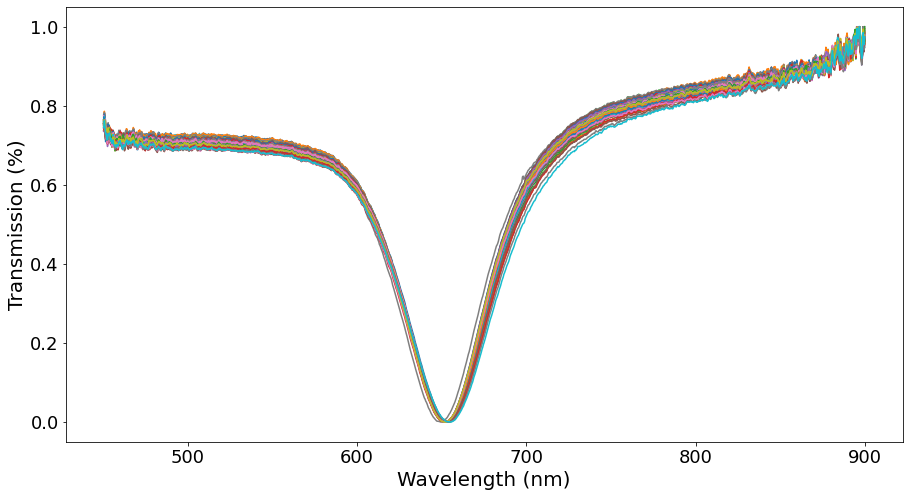

In [8]:


for col in df.columns:
    if col == 'avg_deriv': #Normalise for better plotting
        maxval = df[col].max() - df[col].min()
        df[col] = df[col] / maxval - df[col].min()

    plt.plot(df.index, df[col], label=col)

plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Transmission (%)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig=plt.gcf()
fig.set_size_inches(15, 8)

# plt.legend()

plt.show()

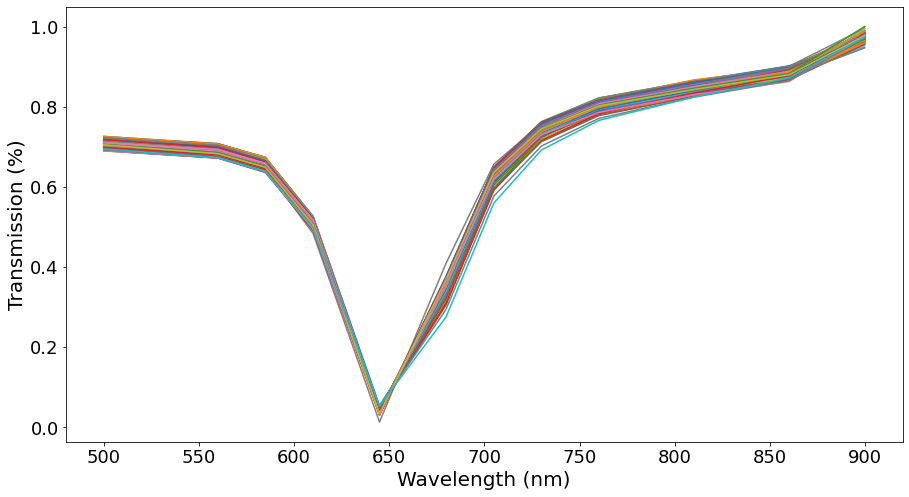

In [9]:


for col in stripped_df.columns:

    plt.plot(stripped_df.index, stripped_df[col], label=col)

plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Transmission (%)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig=plt.gcf()
fig.set_size_inches(15, 8)

# plt.legend()

plt.show()

In [10]:


from scipy.optimize import curve_fit, OptimizeWarning
import warnings
import numpy as np

wl_stripped = stripped_df.index.to_numpy()
tr_stripped = stripped_df['A01__avg'].to_numpy()

wl_full = df.index.to_numpy()
tr_full = df['A01__avg'].to_numpy()


# a1 = 0.9646    
# a2 = 0.0051    
# c1  =  4.4570    
# a2  =  0.5733    
# b2  =  0.0121    
# c2  =  3.0772    
# a3  =  0.0780    
# b3  =  0.0549    
# c3  =  -5.9688   
# a4  =  0.0490    
# b4  =  0.0756    
# c4  =  -0.6380   
# a5  =  0.1936    
# b5  =  0.0342    
# c5  =  -5.0527   
# a6  =  0.0231    
# b6  =  0.0548    
# c6  =  0.3564    
# a7  =  0.0221    
# b7  =  0.0967    
# c7  =  -8.1657   
# a8  =  0.0079    
# b8  =  0.1180    
# c8  =  -9.6075   


initial = [0.9646,    
0.0051,    
4.4570 ,   
0.5733 ,   
0.0121 ,   
3.0772 ,   
0.0780 ,   
0.0549 ,   
-5.9688,   
0.0490 ,   
0.0756 ,   
-0.6380,   
0.1936 ,   
0.0342 ,   
-5.0527,   
0.0231 ,   
0.0548 ,   
0.3564 ,   
0.0221 ,   
0.0967 ,   
-8.1657,   
0.0079 ,   
0.1180 ,   
-9.6075]

def fitted_sine_list(x, coeff_list):
    a1 = coeff_list[0]
    b1 = coeff_list[1]
    c1 = coeff_list[2]
    a2 = coeff_list[3]
    b2 = coeff_list[4]
    c2 = coeff_list[5]
    a3 = coeff_list[6]
    b3 = coeff_list[7]
    c3 = coeff_list[8]
    a4 = coeff_list[9]
    b4 = coeff_list[10]
    c4 = coeff_list[11]
    a5 = coeff_list[12]
    b5 = coeff_list[13]
    c5 = coeff_list[14]
    a6 = coeff_list[15]
    b6 = coeff_list[16]
    c6 = coeff_list[17]
    a7 = coeff_list[18]
    b7 = coeff_list[19]
    c7 = coeff_list[20]
    a8 = coeff_list[21]
    b8 = coeff_list[22]
    c8 = coeff_list[23]

    y = a1*np.sin(b1*x+c1) + a2*np.sin(b2*x+c2) + a3*np.sin(b3*x+c3) + a4*np.sin(b4*x+c4) + a5*np.sin(b5*x+c5) + a6*np.sin(b6*x+c6) + a7*np.sin(b7*x+c7) + a8*np.sin(b8*x+c8)
    return y

def fitted_sine(x, a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5, a6, b6, c6, a7, b7, c7, a8, b8, c8):
    y = a1*np.sin(b1*x+c1) + a2*np.sin(b2*x+c2) + a3*np.sin(b3*x+c3) + a4*np.sin(b4*x+c4) + a5*np.sin(b5*x+c5) + a6*np.sin(b6*x+c6) + a7*np.sin(b7*x+c7) + a8*np.sin(b8*x+c8)
    return y

# Generate Ideal model from original spectrum, use this for starting coefficients
# with warnings.catch_warnings():
#     warnings.simplefilter('ignore', OptimizeWarning)
#     popt, pcov = curve_fit(fitted_sine, wl_full, tr_full, p0=initial, maxfev=1000000)
#     fitted = fitted_sine_list(df.index.to_numpy(), popt)


# curve fit the stripped data
fitted_df = pd.DataFrame(index=df.index, columns=df.columns)
for col in stripped_df.columns:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', OptimizeWarning)
        popt, pcov = curve_fit(fitted_sine, stripped_df.index, stripped_df[col], p0=initial, maxfev=1000000, method='trf')
    fitted = fitted_sine_list(df.index.to_numpy(), popt)
    fitted_df[col] = fitted

stats_df = dp.get_stats(df)
fitted_stats_df = dp.get_stats(fitted_df)


<AxesSubplot:xlabel='wavelength'>

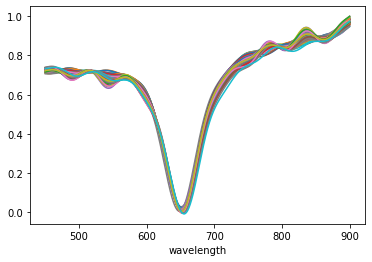

In [11]:
fitted_df.plot(legend=False)

/var/folders/6h/wrjpjjpx0_9chw21zdnrp6lw0000gn/T/ipykernel_29734/2246927124.py:51: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



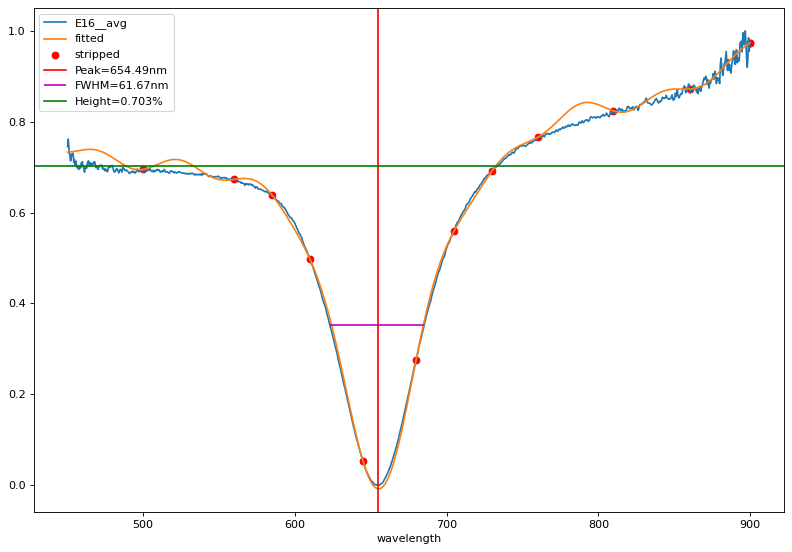

In [66]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure


def plot_stats(df, fitted_df, stripped_df, title=None, stats_df=None):

    # Create a figure of size 8x6 inches, 80 dots per inch
    fig = plt.figure(figsize=(10, 7), dpi=80)
    axes = fig.add_subplot(111)
    fig.set_tight_layout(True)

    df[df.columns[-1]].plot(ax=axes)

    fitted_df[fitted_df.columns[-1]].plot(ax=axes, label='fitted')

    # stripped_df[stripped_df.columns[-1]].plot(ax=axes, label='stripped', color='red', style='o-', kind='scatter')
    plt.scatter(stripped_df.index, stripped_df[stripped_df.columns[-1]], marker='o', color='red', label='stripped')

    # df.plot(ax=axes,
    #         # x='wavelength', 
    #         title = title,
    #         legend = True)

    lines = axes.get_lines()

    if stats_df is not None:
        trans = df[df.columns[-1]]
        row = stats_df.index[-1]
        inflection_min = stats_df.loc[row]['Infl_L']
        inflection_max = stats_df.loc[row]['Infl_R']
        fwhm = stats_df.loc[row]['FWHM']
        peak = stats_df.loc[row]['Peak']
        height = stats_df.loc[row]['Height']

        # Recalculate some FWHM details to position lines on plot
        min = trans.min()
        half_max=min+height/2
        hm_range = trans[trans <= half_max].index
        
        axes.axvline(x=peak, label=f"Peak={peak}nm", color='r')
        # axes.axvline(x=inflection_min, label=f"Infl_L={inflection_min}nm", color='c')
        # axes.axvline(x=inflection_max, label=f"Infl_R={inflection_max}nm", color='c')
        axes.hlines(y=half_max, xmin=hm_range[0], xmax=hm_range[-1], label=f"FWHM={fwhm}nm", color='m')
        axes.axhline(y=min+height, label=f"Height={height}%", color='g')
        # draw()

    for legline, pltline in zip(axes.legend().get_lines(), lines):
        legline.set_picker(True)  # Enable picking on the legend lines.


    fig.show()
plot_stats(df, fitted_df, stripped_df, title='Spectrometer Data', stats_df=stats_df)


In [117]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



def plot_stats(df, fitted_df, stripped_df, title=None, stats_df=None, fitted_stats_df=None):

    cols_to_plot = []

    error_df = fitted_stats_df - stats_df
    max_peak_error_index = error_df['Peak'].abs().idxmax()
    min_peak_error_index = error_df['Peak'].abs().idxmin()
    cols_to_plot.append(max_peak_error_index)
    cols_to_plot.append(min_peak_error_index)

    fig = go.Figure()
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Max delta {max_peak_error_index}", f"Min delta {min_peak_error_index}"))

    subplot = 0
    for name in cols_to_plot:
        subplot += 1
        fig.add_scatter(x=df.index, y=df[name], line_color='blue', mode='lines', name='Orig Spectrum', line=dict(width=1), row=1, col=subplot)
        fig.add_scatter(x=stripped_df.index, y=stripped_df[name] ,name='stripped', mode='markers', marker_color='red', row=1, col=subplot)
        fig.add_scatter(x=fitted_df.index, y=fitted_df[name] ,name='fitted', mode='lines', line_color='green', line=dict(width=1), row=1, col=subplot)

        if stats_df is not None:
            fig.add_vline(x=stats_df.loc[name]['Peak'],
                        line_color='blue',
                        line_width=1,
                        row=1, col=subplot)

        if fitted_stats_df is not None:
            delta_peak = fitted_stats_df.loc[name]['Peak'] - stats_df.loc[name]['Peak']
            fig.add_vline(x=fitted_stats_df.loc[name]['Peak'], 
                        line_color='green',
                        line_width=1,
                        row=1, col=subplot,
                        annotation=dict(
                            text=f"Peak Delta={delta_peak:.2f}nm",
                            xanchor="left",
                            xshift=10,
                            opacity=0.7),)

    fig.show()

plot_stats(df, fitted_df, stripped_df, title='Spectrometer Data', stats_df=stats_df, fitted_stats_df=fitted_stats_df)


In [105]:
error_df = fitted_stats_df-stats_df

# find the maximum error in the error dataframe
max_error = error_df.abs().max().max()

# print(f'{error_df.abs().max()=}')
error_df.abs()['Peak']

# get the index of the maximum value of the peak column
max_peak_error_index = error_df['Peak'].abs().idxmax()
print(f'{max_peak_error_index=}')
print(f'{max_error=}')

# # find the average error in the peak column in the error dataframe
max_peak_error = error_df['Peak'].abs().max()
print(f"Max peak error: {max_peak_error:.4f}")

max_peak_error_index='A08__avg'
max_error=9.129999999999995
Max peak error: 2.4000


In [54]:
error_df

,Peak,FWHM,Height,Infl_L,Infl_R
A01__avg,-0.183798,4.207006,-1.936376,-1.064434,0.359168
A02__avg,-0.183798,5.536272,-3.305785,-1.439745,0.538752
A03__avg,-0.183911,2.821429,-3.172414,-1.064434,0.418783
A04__avg,-0.122457,2.079692,-1.810585,-0.689122,0.238663
A05__avg,-0.122532,3.545471,-2.354571,-0.876778,0.359168
...,...,...,...,...,...
E12__avg,0.061229,0.017117,4.005722,-0.250733,0.179262
E13__avg,0.061341,-1.373481,2.710414,-0.250733,0.300340
E14__avg,0.000000,0.000000,3.988604,0.000000,0.179047
E15__avg,-0.061341,0.000000,0.140449,-0.501467,0.120217


In [44]:
fitted_stats_df

,Peak,FWHM,Height,Infl_L,Infl_R
A01__avg,651.69,59.20,0.709,627.39,676.20
A02__avg,651.69,60.81,0.702,625.01,677.41
A03__avg,651.29,57.58,0.702,627.39,676.20
A04__avg,652.49,58.41,0.705,629.77,676.20
A05__avg,652.09,58.41,0.705,628.58,676.20
...,...,...,...,...,...
E12__avg,653.69,58.43,0.727,632.55,676.20
E13__avg,652.49,56.01,0.720,632.55,674.59
E14__avg,654.49,60.05,0.730,634.14,677.01
E15__avg,651.69,56.39,0.713,630.96,674.59


In [43]:
stats_df

,Peak,FWHM,Height,Infl_L,Infl_R
A01__avg,652.89,56.81,0.723,634.14,673.78
A02__avg,652.89,57.62,0.726,634.14,673.78
A03__avg,652.49,56.00,0.725,634.14,673.38
A04__avg,653.29,57.22,0.718,634.14,674.59
A05__avg,652.89,56.41,0.722,634.14,673.78
...,...,...,...,...,...
E12__avg,653.29,58.42,0.699,634.14,674.99
E13__avg,652.09,56.79,0.701,634.14,672.57
E14__avg,654.49,60.05,0.702,634.14,675.80
E15__avg,652.09,56.39,0.712,634.14,673.78
